# **Desafio 6 - Preveja os usuários com alta chance de deixar seu Streaming** #



**Contexto**

Você trabalha em uma plataforma de streaming e a diretoria está preocupada com o
alto índice de usuários cancelando as suas assinaturas. Eles acreditam que é possível
prever se um usuário tem mais chance de deixar a plataforma antes que isso aconteça,
e com base nessa informação tomar ações para reduzir o churn.
Seu objetivo é criar um modelo de classificação capaz de prever se um usuário tem
mais chance de cancelar a sua assinatura na plataforma ou não. Para isso, a empresa
forneceu uma base de dados em csv contendo dados sobre as contas dos clientes.


**Sobre os dados**

Os dados fornecidos possuem informações sobre as contas dos clientes na plataforma
de streaming, divididos entre contas Basic, Standard e Premium, onde cada uma
oferece uma gama maior de serviços que a anterior.

## 0 - Importação de bibliotecas

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

## 1 - Análise exploratória dos dados ##

In [6]:
dados = pd.read_csv('/content/streaming_data.csv')
df = pd.DataFrame(dados)

In [7]:
display(df)

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f
...,...,...,...,...,...,...,...,...,...,...
77879,45.0,Male,NaN,NaN,Basic,NaN,5,2.20,0.0,6b51fe0d-d4a1-41ed-a55c-d05f5c961e3c
77880,47.0,Female,6176.0,NaN,Premium,NaN,2,4.54,0.0,59d70167-6be0-474c-b71e-14153205b44f
77881,64.0,Female,NaN,5.0,Premium,NaN,1,4.34,1.0,a7d5ed26-78a4-4e70-bd04-0fec883e56aa
77882,58.0,Male,1314.0,5.0,Standard,NaN,4,NaN,0.0,472e9e70-87ca-4c5e-bfee-fa9f42b54f51


In [8]:
df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [10]:
df.isna().sum()

Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64

## 2 - Tratamento dos Dados ##

In [11]:
 # Preenchimento dos NA's por 0
 df[['Time_on_platform','Num_streaming_services', 'Churned', 'Avg_rating', 'Devices_connected']] = df[['Time_on_platform','Num_streaming_services', 'Churned', 'Avg_rating', 'Devices_connected']].fillna(float(0))

In [12]:
# Limpando as linhas com NA das variaveis categoricas
df.dropna(inplace = True)

In [13]:
# Transformando a coluna Churned em categorica
df['Churned'] = df['Churned'].replace(0, 'No')
df['Churned'] = df['Churned'].replace(1, 'Yes')

<Axes: xlabel='Churned', ylabel='User_id'>

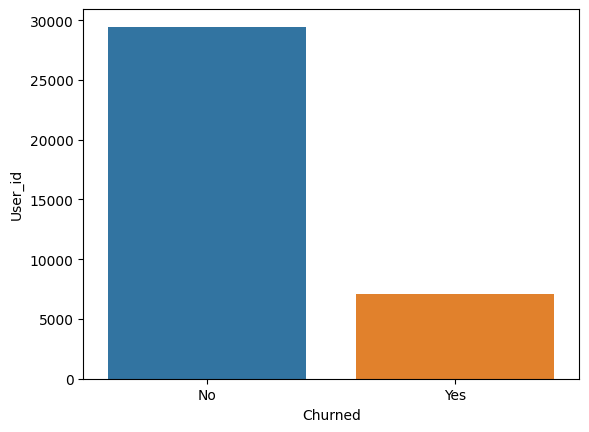

In [14]:
churn_agg = df.groupby("Churned")['User_id'].count().reset_index()
churn_agg = pd.DataFrame(churn_agg)
sns.barplot(data=churn_agg, x = "Churned",y = "User_id")

In [15]:
# Conversão de floats em int
df[['Age', 'Time_on_platform', 'Devices_connected', 'Num_streaming_services', 'Avg_rating']] = df[['Age', 'Time_on_platform', 'Devices_connected', 'Num_streaming_services', 'Avg_rating']].astype(int)

## 3 - Regressão Logística ##

In [17]:
X = df.drop(columns=["Gender","Subscription_type", "Churned", "User_id"], axis=1)

y = df[["Churned"]]

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(y.Churned)
y.Churned = le.transform(y.Churned)

<ipython-input-18-5f8333b3523b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.Churned = le.transform(y.Churned)


In [20]:
X = pd.get_dummies(X)

In [21]:
# Import the necessary sklearn method
from sklearn.preprocessing import MinMaxScaler
# Instantiate a Min-Max scaling object
mm = MinMaxScaler()
# Fit and transform our feature data into a pandas dataframe
X = pd.DataFrame(mm.fit_transform(X))

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
lr = model.fit(X_train, y_train)
lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 0, 0, 0])

In [24]:
X_test.assign(churn = y_test).assign(label = lr.predict(X_test))

,0,1,2,3,4,5,churn,label
10020,0.137255,0.063934,0.2,0.00,0.25,0.2,NaN,0
12908,0.803922,0.513301,0.0,0.00,0.00,0.2,NaN,0
11744,0.078431,0.806599,0.0,0.00,1.00,0.4,NaN,0
23313,0.137255,0.000000,0.0,0.00,0.00,0.6,NaN,0
33372,0.882353,0.000000,0.2,0.50,0.75,0.4,NaN,0
...,...,...,...,...,...,...,...,...
383,0.941176,0.987784,0.8,0.00,0.75,0.2,NaN,0
110,0.039216,0.000000,0.6,0.00,0.00,0.6,NaN,0
35306,0.117647,0.371047,0.0,0.75,0.75,0.4,NaN,0
30115,0.254902,0.379381,0.6,0.00,0.75,0.4,NaN,0


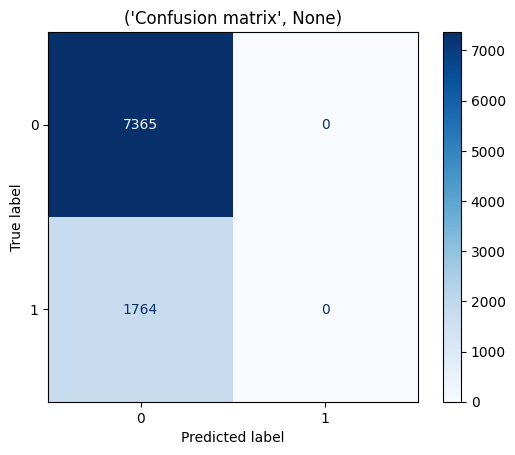

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay
titles_options = [
    ("Confusion matrix", None),
]
for title in titles_options:
  disp = ConfusionMatrixDisplay.from_estimator(
        lr,
        X_test,
        y_test,
        cmap=plt.cm.Blues)

disp.ax_.set_title(title)

plt.show()

In [45]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, lr.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, lr.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, lr.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.8067625794201416
Acurácia (Teste): 0.8067696352283931
Acurácia Balanceada (Treino): 0.5
Acurácia Balanceada (Teste): 0.5
Precision (Treino): 0.0
Precision (Teste): 0.0
Recall (Treino): 0.0
Recall (Teste): 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1-Score (Treino): 0.0
F1-Score (Teste): 0.0
ROCAUC (Treino): 0.5103166657669174
ROCAUC (Teste): 0.5081143115766333


## 4 - Random Forest ##

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier()
rf.fit(X_train, y_train)
rf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


array([0, 0, 0, ..., 0, 0, 0])

In [51]:
X_test.assign(churn = y_test).assign(label = rf.predict(X_test))

,0,1,2,3,4,5,churn,label
10020,0.137255,0.063934,0.2,0.00,0.25,0.2,NaN,0
12908,0.803922,0.513301,0.0,0.00,0.00,0.2,NaN,0
11744,0.078431,0.806599,0.0,0.00,1.00,0.4,NaN,0
23313,0.137255,0.000000,0.0,0.00,0.00,0.6,NaN,0
33372,0.882353,0.000000,0.2,0.50,0.75,0.4,NaN,0
...,...,...,...,...,...,...,...,...
383,0.941176,0.987784,0.8,0.00,0.75,0.2,NaN,0
110,0.039216,0.000000,0.6,0.00,0.00,0.6,NaN,0
35306,0.117647,0.371047,0.0,0.75,0.75,0.4,NaN,0
30115,0.254902,0.379381,0.6,0.00,0.75,0.4,NaN,0


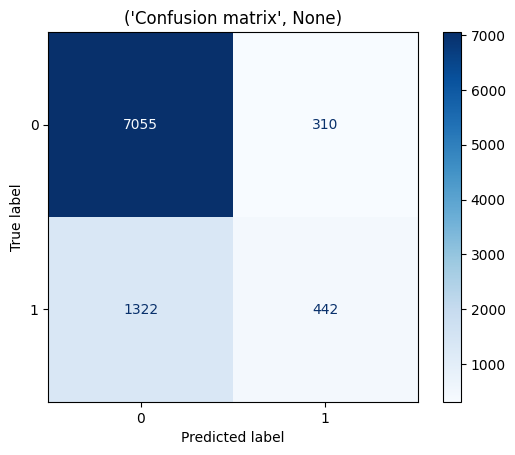

In [52]:
titles_options = [
    ("Confusion matrix", None),
]
for title in titles_options:
  disp = ConfusionMatrixDisplay.from_estimator(
        rf,
        X_test,
        y_test,
        cmap=plt.cm.Blues)

disp.ax_.set_title(title)

plt.show()

In [53]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.9796976557365077
Acurácia (Teste): 0.8212290502793296
Acurácia Balanceada (Treino): 0.9561619267664219
Acurácia Balanceada (Teste): 0.6042379613080806
Precision (Treino): 0.9756930494174367
Precision (Teste): 0.5877659574468085
Recall (Treino): 0.9178004535147393
Recall (Teste): 0.25056689342403626
F1-Score (Treino): 0.9458617332035054
F1-Score (Teste): 0.3513513513513513
ROCAUC (Treino): 0.9978324507236688
ROCAUC (Teste): 0.6572271791721893


## 5 - Tunning ##

In [54]:
# Importamos GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'n_estimators': [100, 300, 500]}

grid_search = GridSearchCV(rf, parameters, scoring='accuracy', cv=5, n_jobs=-1)

In [55]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [58]:
param = grid_search.best_estimator_.get_params()
param

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf_tunned =  RandomForestClassifier(bootstrap = True, ccp_alpha = 0.0,
                                     class_weight = None, criterion= 'gini',
                                     max_depth = 9, max_features= 'sqrt',
                                     max_leaf_nodes = None,
                                     max_samples = None,
                                     min_impurity_decrease = 0.0,
                                     min_samples_leaf = 1,
                                     min_samples_split = 2,
                                     min_weight_fraction_leaf = 0.0,
                                     n_estimators = 100, n_jobs = None,
                                     oob_score = False, random_state = None,
                                     verbose = 0, warm_start = False)
rf_tunned

RandomForestClassifier(max_depth=9)

In [60]:
rf_tunned.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=9)

In [61]:
X_test.assign(churn = y_test).assign(label = rf_tunned.predict(X_test))

,0,1,2,3,4,5,churn,label
10020,0.137255,0.063934,0.2,0.00,0.25,0.2,NaN,0
12908,0.803922,0.513301,0.0,0.00,0.00,0.2,NaN,0
11744,0.078431,0.806599,0.0,0.00,1.00,0.4,NaN,0
23313,0.137255,0.000000,0.0,0.00,0.00,0.6,NaN,0
33372,0.882353,0.000000,0.2,0.50,0.75,0.4,NaN,0
...,...,...,...,...,...,...,...,...
383,0.941176,0.987784,0.8,0.00,0.75,0.2,NaN,0
110,0.039216,0.000000,0.6,0.00,0.00,0.6,NaN,0
35306,0.117647,0.371047,0.0,0.75,0.75,0.4,NaN,0
30115,0.254902,0.379381,0.6,0.00,0.75,0.4,NaN,0


In [62]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf_tunned.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf_tunned.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf_tunned.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf_tunned.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf_tunned.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.8073833345505003
Acurácia (Teste): 0.8068791762515062
Acurácia Balanceada (Treino): 0.5016061980347695
Acurácia Balanceada (Teste): 0.5002834467120182
Precision (Treino): 1.0
Precision (Teste): 1.0
Recall (Treino): 0.003212396069538927
Recall (Teste): 0.0005668934240362812
F1-Score (Treino): 0.0064042192503296295
F1-Score (Teste): 0.0011331444759206798
ROCAUC (Treino): 0.7960194779660957
ROCAUC (Teste): 0.5555243052188062
